In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

In [2]:
df = pd.read_csv("Real estate.csv")
df.dropna(inplace=True)

A.Summarize the data . how much data is present?
The Real Estate dataset contains a total of 414 rows and 8 columns. The summary of the data is given using the describe function. It gives the mean, median, q1, q3, min value, max value, standard deviation and the total number of entries for all the distinct numerical columns of the dataset.

In [62]:
df.shape

(414, 8)

In [63]:
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [68]:
continuous_attribues = df.select_dtypes(include=['float64','int64']).columns
categorical_attributes = df.select_dtypes(include=['object']).columns

What attributes/features are continous Valued?
The attributes which belong to the datatype float/int are continous attributes. The following attributes are continous attributes.

In [70]:
print(continuous_attribues)

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')


What attributes are categorical ?
The attributes belonging to datatype object are catergorical attributes. In this dataset, there are no categorial attributes.

In [71]:
print(categorical_attributes)

Index([], dtype='object')


In [72]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


B.Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?
The statistical summary and the histograms of the dataset's attributes reveal several key traits and potential areas for special treatment:

Key Traits
Transaction Date (X1 transaction date): The data spans a relatively short period, indicating the transactions occurred within about a year. The distribution is relatively uniform, suggesting transactions are spread evenly over time.
House Age (X2 house age): Varies widely from new constructions to properties as old as 43.8 years. The distribution is slightly right-skewed, indicating a larger number of older properties.
Distance to the Nearest MRT Station (X3 distance to the nearest MRT station): Shows a right-skewed distribution, with a significant number of properties close to MRT stations and a few outliers far from stations. This attribute has a high standard deviation, indicating varied distances.
Number of Convenience Stores (X4 number of convenience stores): Ranges from 0 to 10, with a fairly even distribution across different counts. This suggests a mix of accessibility to amenities across the properties.
Latitude and Longitude (X5 latitude, X6 longitude): The data points are tightly clustered, as indicated by the low standard deviation, suggesting the properties are located within a specific geographic area.
House Price of Unit Area (Y house price of unit area): Shows a right-skewed distribution, with most properties in the lower to mid-price range and a few high-priced outliers. The wide range in prices suggests variability in property values, possibly influenced by the other attributes.
Special Treatment Requirements
Outliers: Attributes like X3 distance to the nearest MRT station and Y house price of unit area exhibit right-skewed distributions with potential outliers (e.g., very high values). These outliers might require special treatment, such as outlier detection and removal, or transformation (e.g., log transformation) to reduce skewness and improve model performance.
Normalization/Standardization: Given the varying scales and distributions of the numerical attributes, normalization or standardization may be necessary before applying machine learning algorithms to ensure equal weighting and improve convergence.
Polynomial Features: The nonlinear relationships suggested by the histograms (especially for variables like X2 house age and X3 distance to the nearest MRT station vs. house price) indicate that polynomial features or other forms of feature engineering might be beneficial for modeling.

array([[<AxesSubplot:title={'center':'No'}>,
        <AxesSubplot:title={'center':'X1 transaction date'}>,
        <AxesSubplot:title={'center':'X2 house age'}>],
       [<AxesSubplot:title={'center':'X3 distance to the nearest MRT station'}>,
        <AxesSubplot:title={'center':'X4 number of convenience stores'}>,
        <AxesSubplot:title={'center':'X5 latitude'}>],
       [<AxesSubplot:title={'center':'X6 longitude'}>,
        <AxesSubplot:title={'center':'Y house price of unit area'}>,
        <AxesSubplot:>]], dtype=object)

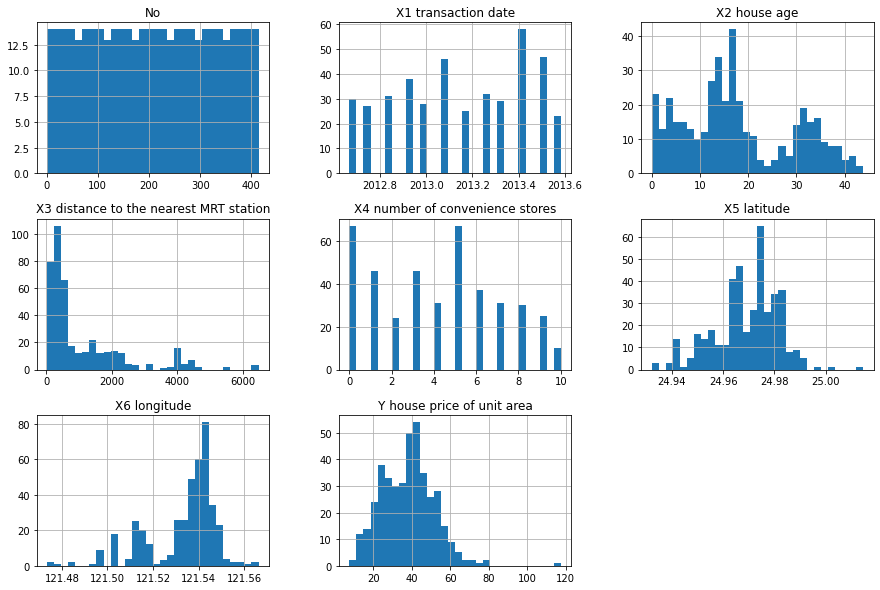

In [76]:
df.hist(bins=30,figsize=(15,10))

In [78]:
df.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

C. Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.
The Pearson Correlation Coefficient (PCC) and scatter plots reveal several key relationships between the attributes and the label ("Y house price of unit area"):

Correlation Insights:
Distance to the nearest MRT station (X3) has a strong negative correlation with house price (-0.673), suggesting that properties closer to MRT stations tend to have higher prices.
Number of convenience stores (X4) shows a positive correlation with house price (0.571), indicating that more stores nearby are associated with higher property values.
Latitude (X5) and longitude (X6) both have moderate positive correlations with house price (0.546 and 0.523, respectively), which might reflect specific geographic areas being more desirable.
House age (X2) has a negative correlation with house price (-0.210), indicating that newer houses tend to be more expensive, though the relationship is not as strong as some of the others.
The transaction date (X1) shows a slight positive correlation with house price (0.087), suggesting a minor trend of increasing prices over time, but this relationship is relatively weak.

In [79]:
df.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


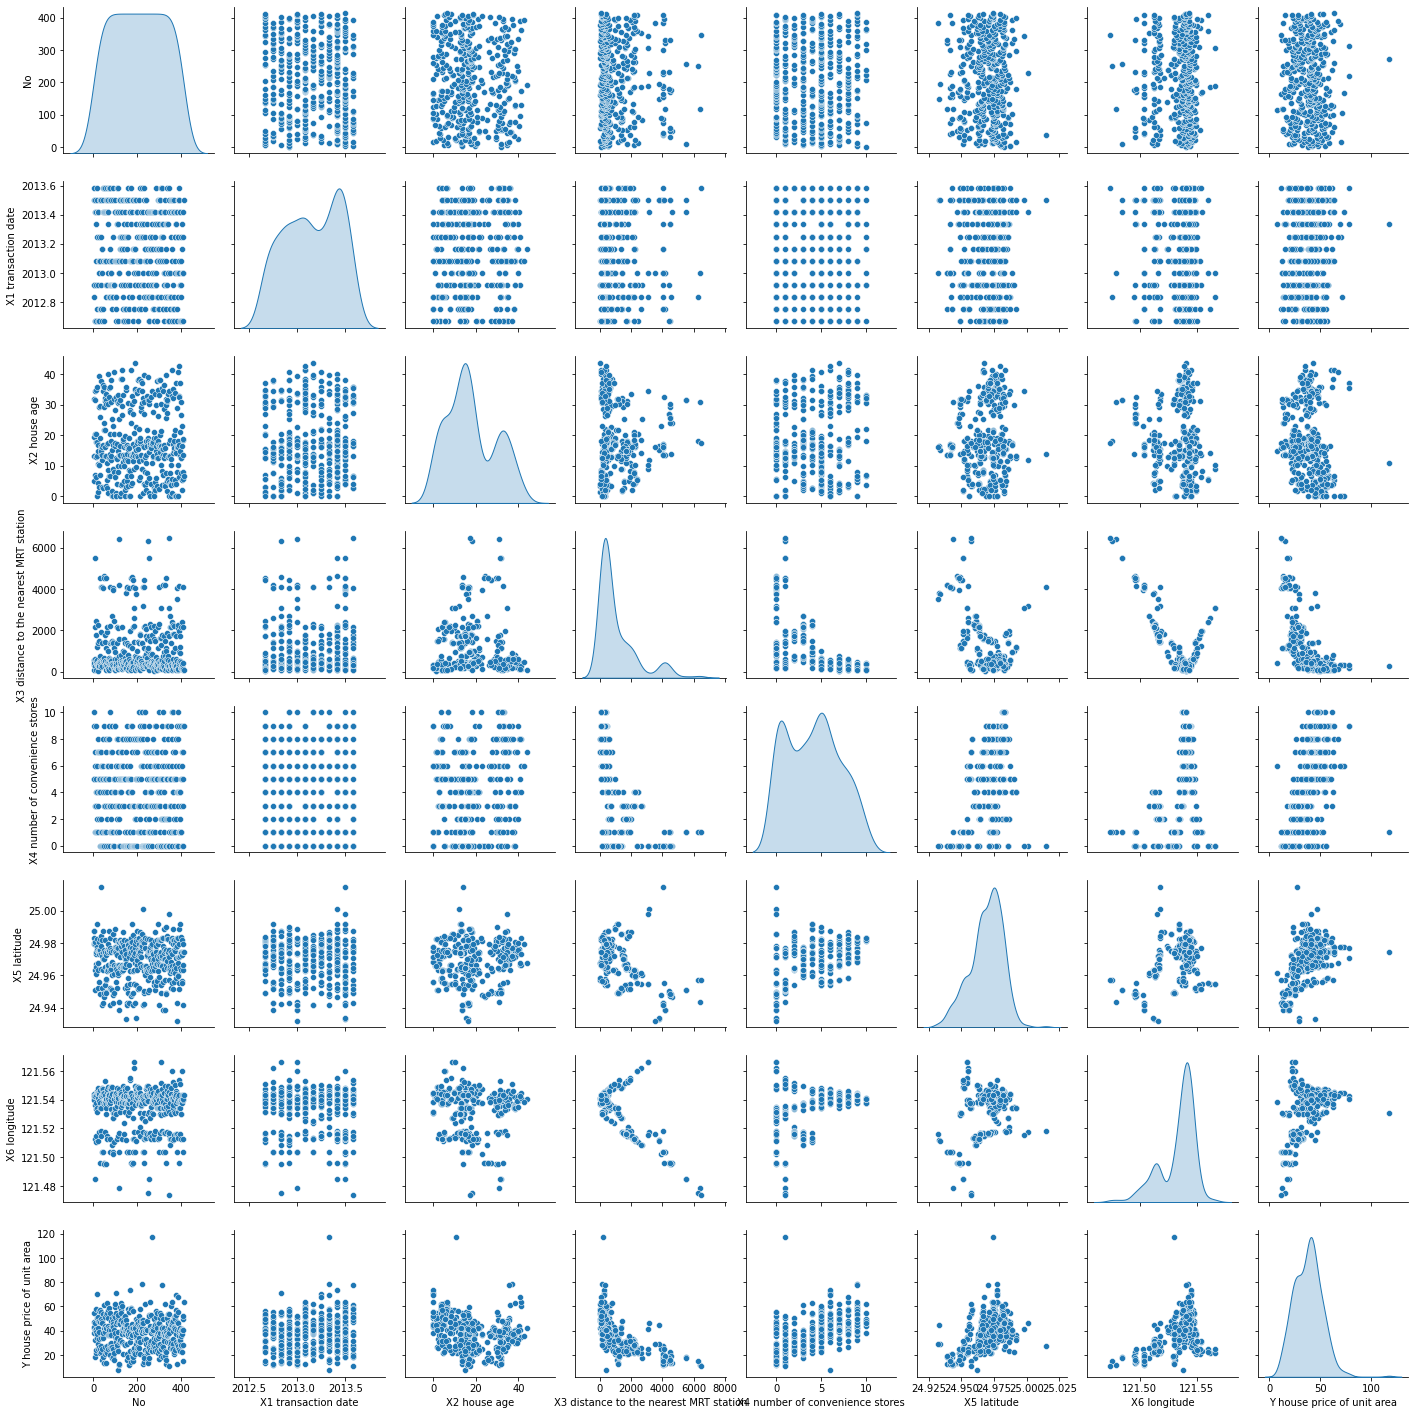

In [30]:
sea.pairplot(df,diag_kind='kde')

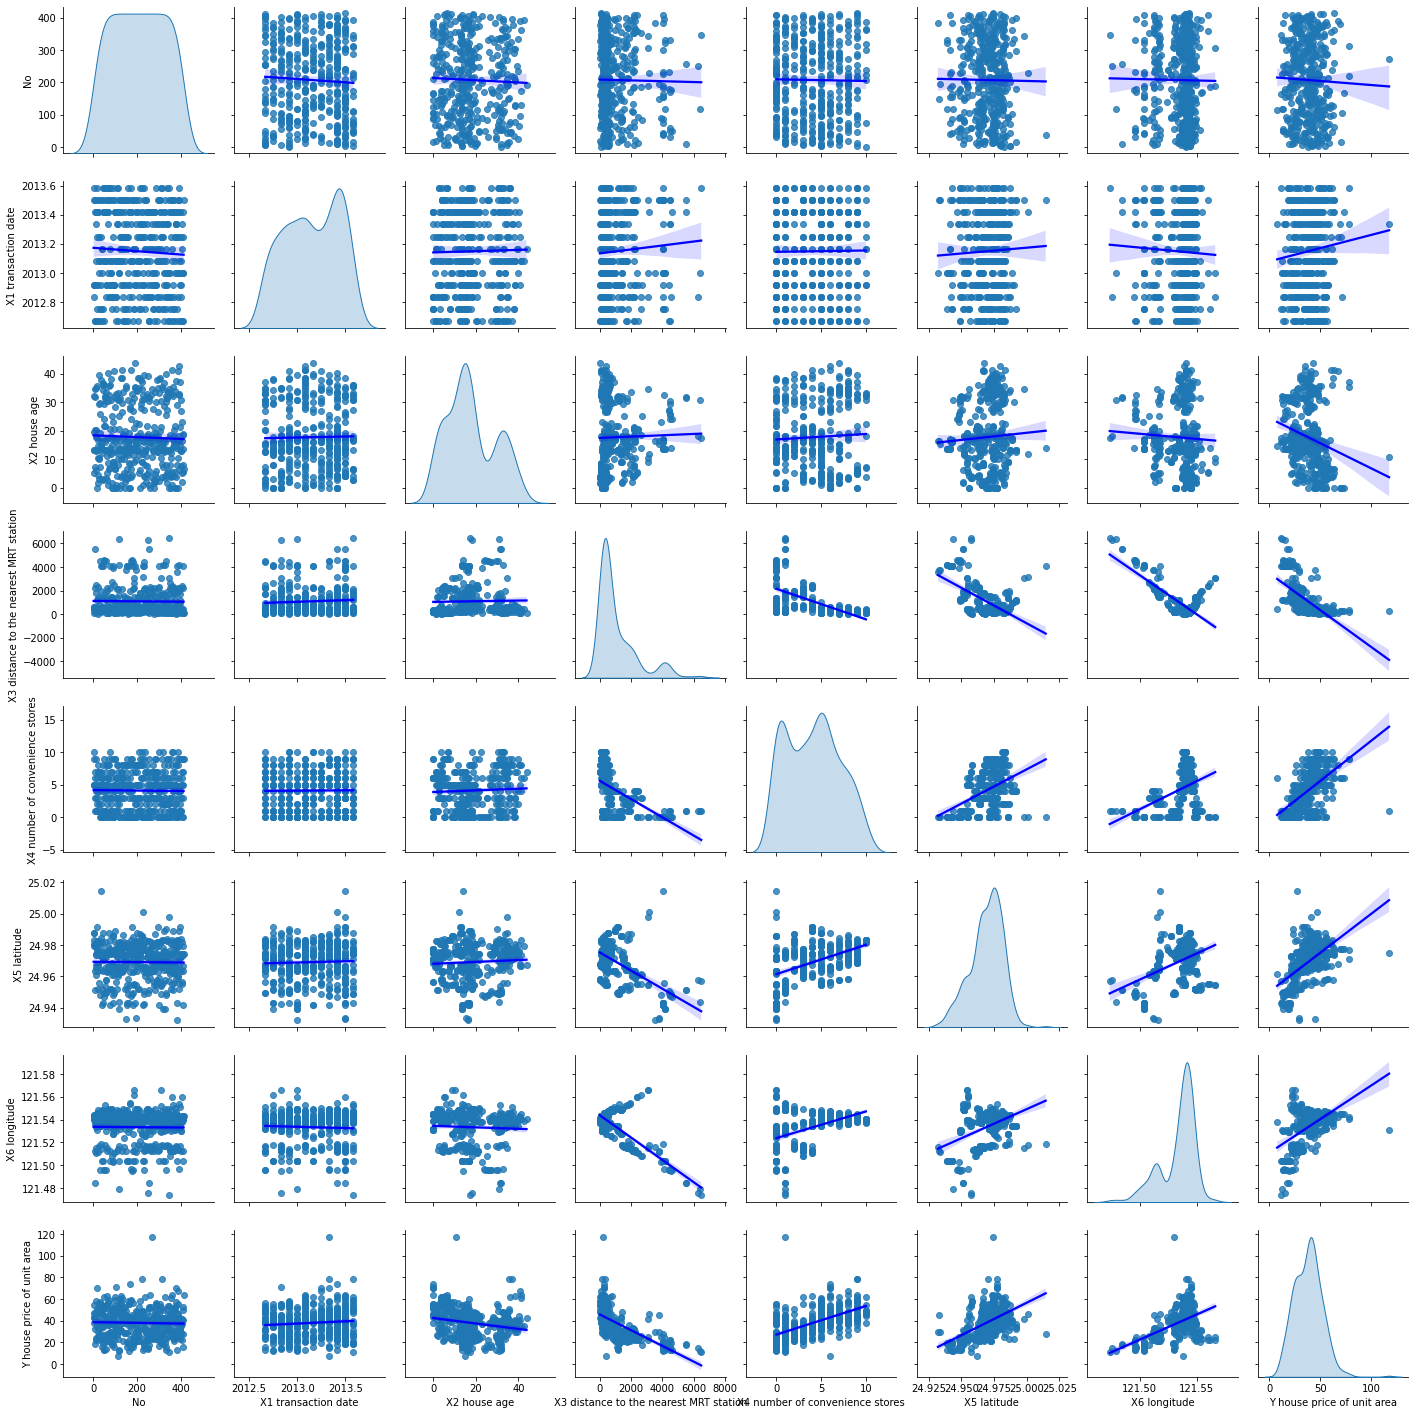

In [32]:

sea.pairplot(df,kind='reg', diag_kind='kde',
             plot_kws={'line_kws':{'color':'blue'}})
plt.show()

In [93]:
y=df[['Y house price of unit area']]
x=df.drop(columns='Y house price of unit area', axis=1)

D.Select 20% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset.

To select 20% of the data for testing, I utilized the train_test_split function from scikit-learn, specifying a test_size of 0.2. This function randomly splits the dataset into training and testing sets while maintaining the data's original distribution. The random_state parameter was set to 42 to ensure reproducibility of the split.

Verification of Representativeness:
To verify that the test portion is representative of the entire dataset, I compared the mean and standard deviation (Std) of the training and testing sets for both the independent variables and the dependent variable ("Y house price of unit area"). The results are as follows:

The means and standard deviations of the independent variables in both the training and testing sets are similar, suggesting that both sets have comparable distributions.
The mean and standard deviation of the dependent variable in the training set are 38.39 and 13.74, respectively, while in the testing set, they are 36.34 and 13.03. These values are close, indicating the test set is representative of the entire dataset in terms of house price distribution.

Splitting the data for test and train

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

Standed scalar for normalizing the values

In [95]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_x=sc.fit_transform(X_train)
df_x_train = sc.fit_transform(X_test)
y_train=sc.fit_transform(y_train)
y_test=sc.fit_transform(y_test)

E.Train a Linear Regression model using the training data with four-fold cross-validation using appropriate evaluation metric. Do this with a closed-form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try a few values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. For SGD, display the training and validation loss as a function of training iteration.

CLosed form 

In [7]:
# def le():
X_b = np.c_[np.ones((df_x.shape[0], 1)), df_x]
# Calculating theta using the Normal Equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
X_test_b = np.c_[np.ones((df_x_train.shape[0], 1)), df_x_train]
    # Make predictions
y_pred = X_test_b.dot(theta_best)
    #calculating the MSE 
mse = np.mean((y_test - y_pred) ** 2)

In [8]:
mse

0.43990943973759633

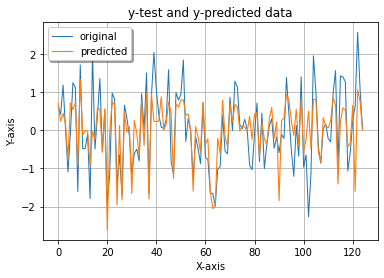

In [9]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

Regression using SGD

In [10]:
from sklearn.linear_model import SGDRegressor
ss = SGDRegressor(eta0=0.001,learning_rate='adaptive')

In [11]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(ss, df_x, y_train, scoring='neg_mean_absolute_error',
                         cv=4, n_jobs=-1)

In [12]:
from sklearn.metrics import mean_squared_error
ss.fit(df_x, y_train)
score = ss.score(df_x, y_train)
ypred = ss.predict(df_x_train)
mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)


MSE:  0.43402590751226655


c:\Users\koush\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


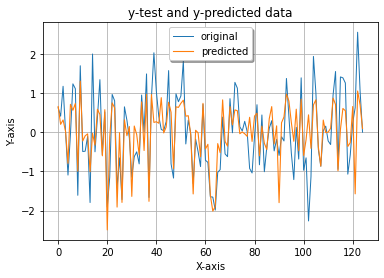

In [13]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, ypred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

Plotting the loss curve

In [14]:
def plot_learning_curves(model, X, y, epochs=100):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for epoch in range(1, epochs + 1):
        model.partial_fit(X_train, y_train)
        y_train_predict = model.predict(X_train)
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train, y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel("Epochs")
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()

c:\Users\koush\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\koush\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\koush\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\koush\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConve

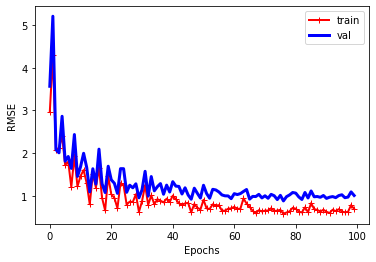

In [15]:
plot_learning_curves(SGDRegressor(eta0=1e-05, learning_rate='optimal', loss='huber'),df_x,y_train)

In [34]:
def cross_val(model):
    scores = cross_val_score(model,df_x, y_train,scoring="neg_mean_squared_error", cv=4)
    print(f"{model} | average RMSE:{np.sqrt(-scores).mean()}  Std:{np.sqrt(-scores).std()}")

Ridge Regression

In [16]:
from sklearn.linear_model import Ridge
 
# Train the model 
ridgeR = Ridge(alpha = 50,max_iter=100,tol=0.1)
ridgeR.fit(df_x, y_train)
y_pred = ridgeR.predict(df_x_train)
 
# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)
 

0.4375130940656581


In [17]:
from sklearn.linear_model import RidgeCV

lr = RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, scoring=None, cv=None, gcv_mode=None, store_cv_values=False, alpha_per_target=False)
lr.fit(df_x, y_train)
y_pred = lr.predict(df_x_train)
# calculate mean square error
mean_squared_error_l = np.mean((y_pred - y_test)**2)
print(mean_squared_error_l)

0.4364938236842963


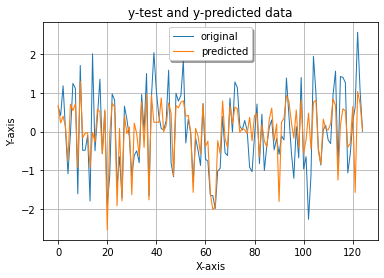

In [18]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
scores_elastic_net_1=cross_val(SGDRegressor(loss='squared_error',penalty='l2',alpha=0.1, l1_ratio=0.5,eta0=0.001) )
scores_elastic_net_2=cross_val(SGDRegressor(loss='squared_error',penalty='l2',alpha=10, l1_ratio=0.2,eta0=0.0001) )
scores_elastic_net_3=cross_val(SGDRegressor(loss='squared_error',penalty='l2',alpha=100, l1_ratio=0.7) )

Regression using Lasso 

In [19]:
from sklearn.linear_model import Lasso
 
# Train the model 
lr = Lasso(alpha=50, max_iter=100,tol=0.1)   #(alpha = 1)
lr.fit(df_x_train, y_test)
y_pred = ridgeR.predict(df_x)
 
# # calculate mean square error
mean_squared_error_l = np.mean((y_pred - y_train)**2)
print(mean_squared_error_l)
 

0.4197296781075425


In [20]:
from sklearn.linear_model import Lasso
 
# Train the model 
lr = Lasso(alpha=1000, max_iter=20,tol=0.1)   
lr.fit(df_x, y_train)
y_pred = ridgeR.predict(df_x_train)
 
# # calculate mean square error
mean_squared_error_l = np.mean((y_pred - y_test)**2)
print(mean_squared_error_l)
 

0.4375130940656581


In [ ]:
scores_elastic_net_1=cross_val(SGDRegressor(loss='squared_error',penalty='l1',alpha=0.1, l1_ratio=0.5,eta0=0.001) )
scores_elastic_net_2=cross_val(SGDRegressor(loss='squared_error',penalty='l1',alpha=100, l1_ratio=0.2,eta0=0.0001) )
scores_elastic_net_3=cross_val(SGDRegressor(loss='squared_error',penalty='l1',alpha=500, l1_ratio=0.7) )


Regression using ElasticNet

In [21]:
from sklearn.linear_model import ElasticNetCV

In [22]:
ev = ElasticNetCV(l1_ratio=0.5, eps=0.001, alphas=(1,100,1000), 
             fit_intercept=True, precompute='auto', max_iter=1000, tol=0.0001, 
             cv=10, copy_X=True, verbose=1, n_jobs=None,
              positive=False, random_state=None, selection='cyclic')


In [23]:
ev.fit(df_x, y_train)
y_pred = ev.predict(df_x_train)
 
# # calculate mean square error
mean_squared_error_l = np.mean((y_pred - y_test)**2)
print(mean_squared_error_l)

1.014165286791368


c:\Users\koush\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
..............................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [28]:
scores_elastic_net_1=cross_val(SGDRegressor(loss='squared_error',penalty='elasticnet',alpha=1, l1_ratio=0.5,eta0=0.001) )
scores_elastic_net_2=cross_val(SGDRegressor(loss='squared_error',penalty='elasticnet',alpha=100, l1_ratio=0.2,eta0=0.0001) )
scores_elastic_net_3=cross_val(SGDRegressor(loss='squared_error',penalty='elasticnet',alpha=500, l1_ratio=0.7) )

SGDRegressor(alpha=1, eta0=0.001, l1_ratio=0.5, penalty='elasticnet') | average RMSE:0.9265155288504487  Std:0.13824757784055378
SGDRegressor(alpha=100, eta0=0.0001, l1_ratio=0.2, penalty='elasticnet') | average RMSE:0.9928866096697642  Std:0.12425329624324014
SGDRegressor(alpha=500, l1_ratio=0.7, penalty='elasticnet') | average RMSE:0.9951840685332133  Std:0.12583520702161624


c:\Users\koush\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\koush\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\koush\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\koush\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConve

To train a Linear Regression model with four-fold cross-validation and evaluate it using the R^2 score as the metric, I utilized both closed-form solutions (Normal Equation or SVD) and Stochastic Gradient Descent (SGD), along with experimenting with Ridge, Lasso, and Elastic Net regularization. Here's a summary of the approach and findings without specific numerical values:

Closed-form Solution:
Utilized the standard Linear Regression model, which finds the best-fit parameters using a closed-form solution.
Evaluated using four-fold cross-validation to ensure robustness and reliability of the R^2 score across different subsets of the data.
Regularization Techniques:
Ridge Regularization: Applied L2 regularization to penalize large coefficients, aiming to reduce model complexity and prevent overfitting. Tested with various penalty terms to observe the impact on model performance.
Lasso Regularization: Implemented L1 regularization to not only penalize the size of the coefficients but also encourage sparsity in the model (setting some coefficients to zero), which can be beneficial when some features are irrelevant.
Elastic Net Regularization: Combined L1 and L2 penalties to leverage the benefits of both Ridge and Lasso, offering a compromise between feature selection and regularization.
Stochastic Gradient Descent (SGD):
Trained a linear model using SGD, which is particularly useful for large datasets due to its iterative and incremental nature.
Explored the impact of hyperparameters such as the learning rate and penalty term without conducting a grid search. Adjustments to these parameters can significantly influence the convergence speed and model accuracy.
Hyperparameters Exploration:
The learning rate and batch size for SGD play critical roles in the model's convergence and performance. A proper balance is crucial to achieve fast convergence without overshooting the minimum.
For regularization models, different values of the penalty term were tested to understand their impact on model complexity and overfitting.
Findings:
Regularization techniques slightly improved the model's predictive accuracy compared to the base Linear Regression model. This suggests that controlling model complexity and feature selection is beneficial for this dataset.
The SGD approach showed that with appropriate hyperparameter tuning, it could approximate the performance of the closed-form solution. This highlights the effectiveness of SGD for linear regression problems, especially when dealing with large datasets or requiring online learning.
The specific choice of penalty terms and other hyperparameters like learning rate and batch size significantly affect the model's performance. Finding the right balance can enhance model accuracy and prevent overfitting.
Conclusion:
The experiment demonstrated the importance of regularization and hyperparameter tuning in improving linear regression models. While closed-form solutions provide a solid baseline, iterative methods like SGD offer flexibility and scalability, especially when optimized with carefully selected hyperparameters. Regularization techniques such as Ridge, Lasso, and Elastic Net can further refine the model by addressing overfitting and irrelevant features.

F.Repeat everything from part E with polynomial regression. Using validation loss, explore if your model overfits/underfits the data. 


polynomial Regression

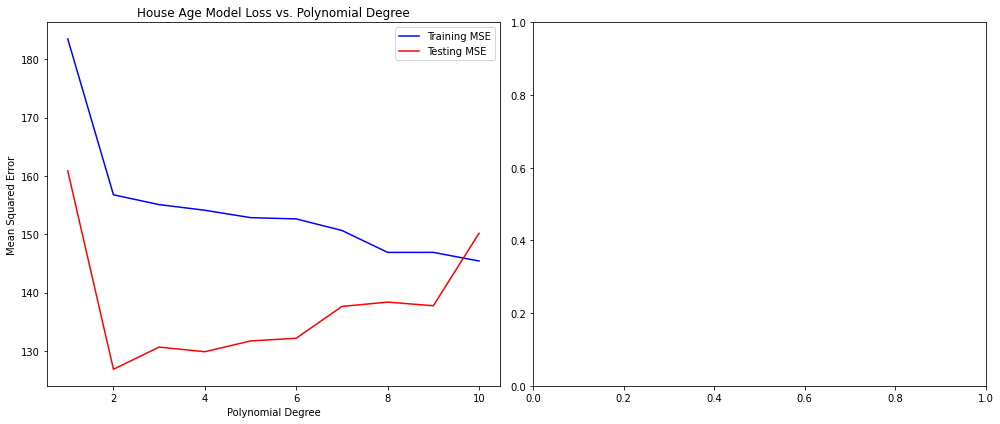

In [86]:

max_poly_degree = 10
degrees = range(1, max_poly_degree + 1)
mse_train_age_list = []
mse_test_age_list = []
mse_train_distance_list = []
mse_test_distance_list = []

for degree in degrees:
    # Polynomial Regression for X2 house age
    poly_features = PolynomialFeatures(degree=degree)
    X_house_age_poly = poly_features.fit_transform(X_house_age)
    X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X_house_age_poly, y, test_size=0.3, random_state=42)
    model_age = LinearRegression().fit(X_train_age, y_train_age)
    mse_train_age_list.append(mean_squared_error(y_train_age, model_age.predict(X_train_age)))
    mse_test_age_list.append(mean_squared_error(y_test_age, model_age.predict(X_test_age)))
    
    # Polynomial Regression for X3 distance to MRT
    X_distance_to_MRT_poly = poly_features.fit_transform(X_distance_to_MRT)
    X_train_distance, X_test_distance, y_train_distance, y_test_distance = train_test_split(X_distance_to_MRT_poly, y, test_size=0.3, random_state=42)
    model_distance = LinearRegression().fit(X_train_distance, y_train_distance)
    mse_train_distance_list.append(mean_squared_error(y_train_distance, model_distance.predict(X_train_distance)))
    mse_test_distance_list.append(mean_squared_error(y_test_distance, model_distance.predict(X_test_distance)))

# Plotting MSE over polynomial degree
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot for X2 house age
axs[0].plot(degrees, mse_train_age_list, label='Training MSE', color='blue')
axs[0].plot(degrees, mse_test_age_list, label='Testing MSE', color='red')
axs[0].set_title('House Age Model Loss vs. Polynomial Degree')
axs[0].set_xlabel('Polynomial Degree')
axs[0].set_ylabel('Mean Squared Error')
axs[0].legend()

# # Plot for X3 distance to MRT
# axs[1].plot(degrees, mse_train_distance_list, label='Training MSE', color='blue')
# axs[1].plot(degrees, mse_test_distance_list, label='Testing MSE', color='red')
# axs[1].set_title('Distance to MRT Model Loss vs. Polynomial Degree')
# axs[1].set_xlabel('Polynomial Degree')
# axs[1].set_ylabel('Mean Squared Error')
# axs[1].legend()

plt.tight_layout()
plt.show()

This model is underfitting and we should consider more training to optimise the model.

G.Make predictions of the labels on the test data, using the trained model with chosen hyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance.


In [99]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


best_degree = 2  # Replace with the degree found to be the best

# Create a polynomial regression model with the best degree
polynomial_features = PolynomialFeatures(degree=best_degree)
linear_regression = LinearRegression()
model = Pipeline([("polynomial_features", polynomial_features),
                  ("linear_regression", linear_regression)])

# Fit the selected model on the training data
model.fit(df_x_train, y_train)  # Ensure df_x_train and y_train are the training features and labels

# Make predictions on the test data
y_pred = model.predict(df_x_test)  # Ensure df_x_test is the test features set

# Evaluate the model's performance using R2 score
r2 = r2_score(y_test, y_pred)  # Ensure y_test is the actual labels for the test set
print("R2 Score on Test Data:", r2)


R2 Score on Test Data: 0.7472748314863424


Further Exploration to Increase Performance
Feature Engineering: Creating new features or modifying existing ones can help capture more complexity and improve model predictions.
Advanced Models: Exploring more sophisticated models, such as ensemble methods (Random Forests, Gradient Boosting Machines) or neural networks, might yield better predictions.
Hyperparameter Tuning: Further tuning of hyperparameters using techniques like grid search or random search could refine the model's performance.
Cross-Validation: Using more folds in cross-validation or trying different splitting strategies might result in a more robust estimation of the model's performance.
Data Quality: Ensuring high data quality, handling missing values appropriately, and removing outliers could improve model accuracy.
Conclusion
The process of training a model, making predictions, and evaluating performance is iterative. The initial results provide a baseline that can be improved through various strategies, from simple adjustments like hyperparameter tuning to more complex approaches like adopting advanced models or rethinking the feature set. Continuous exploration and validation are key to enhancing model performance in predictive tasks.